Lab 5
Emily Goodman

Part One: data exploration

In [28]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/insurance_costs_1.csv")

1) show summaries of data

In [3]:
data.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


2) fix any concerns and create dummies

In [4]:
data.dropna()
datadum = pd.get_dummies(data, columns=['sex', 'smoker'], drop_first=True)
datadum.head()

,age,bmi,region,charges,sex_male,smoker_yes
0,19,27.900,southwest,16884.92400,False,True
1,33,22.705,northwest,21984.47061,True,False
2,32,28.880,northwest,3866.85520,True,False
3,31,25.740,southeast,3756.62160,False,False
4,60,25.840,northwest,28923.13692,False,False


3) make comparison plots

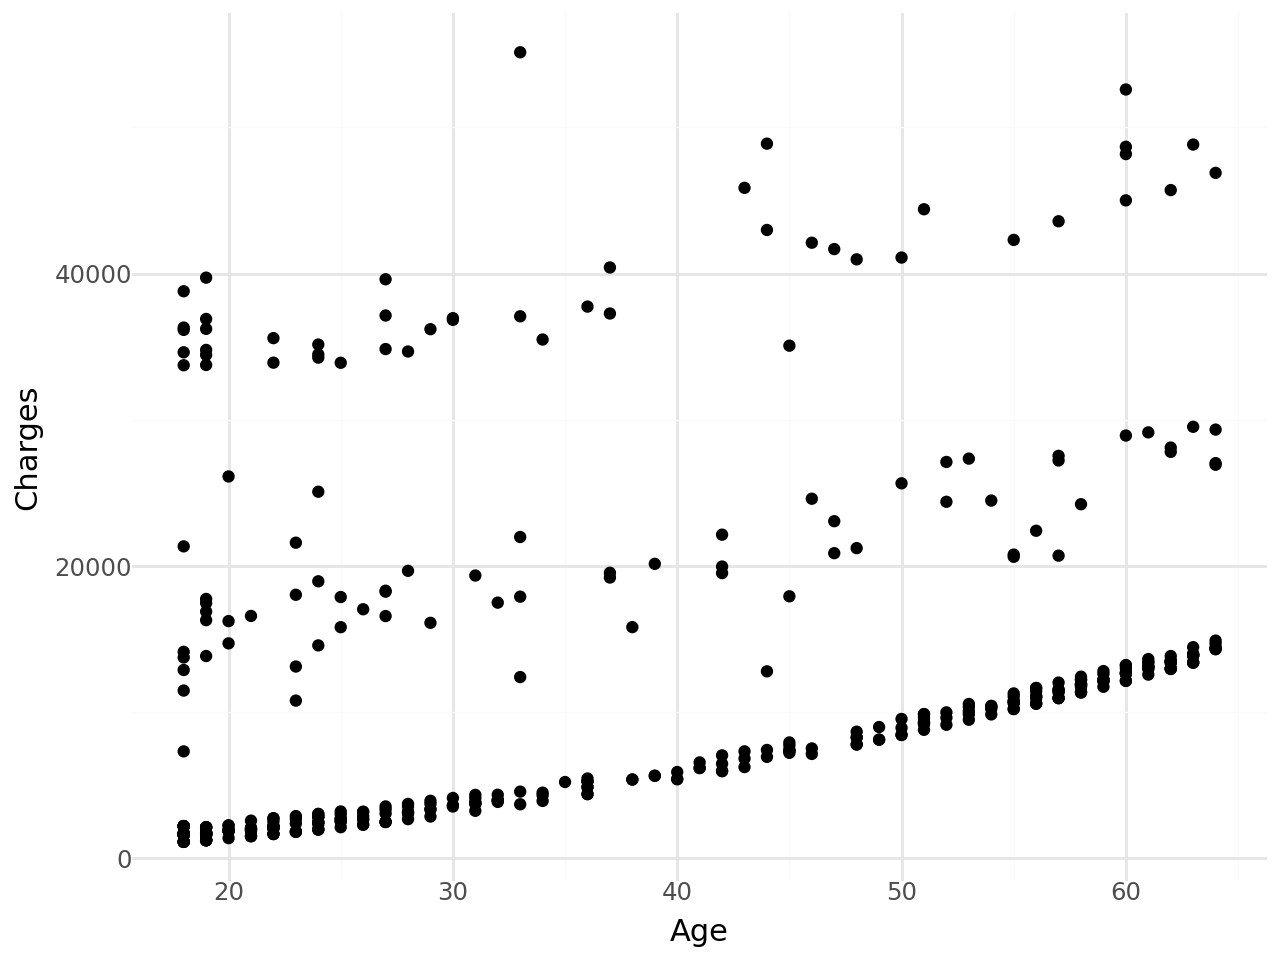

In [5]:
(ggplot(datadum, aes(x='age', y='charges'))
+ geom_point()
+labs(x="Age", y="Charges")
+theme_minimal())

The plot above shows age in response to charge, there are three distinct lines in the plot, as well as a clear showing that there is a trend where as age increases so does insurance costs.

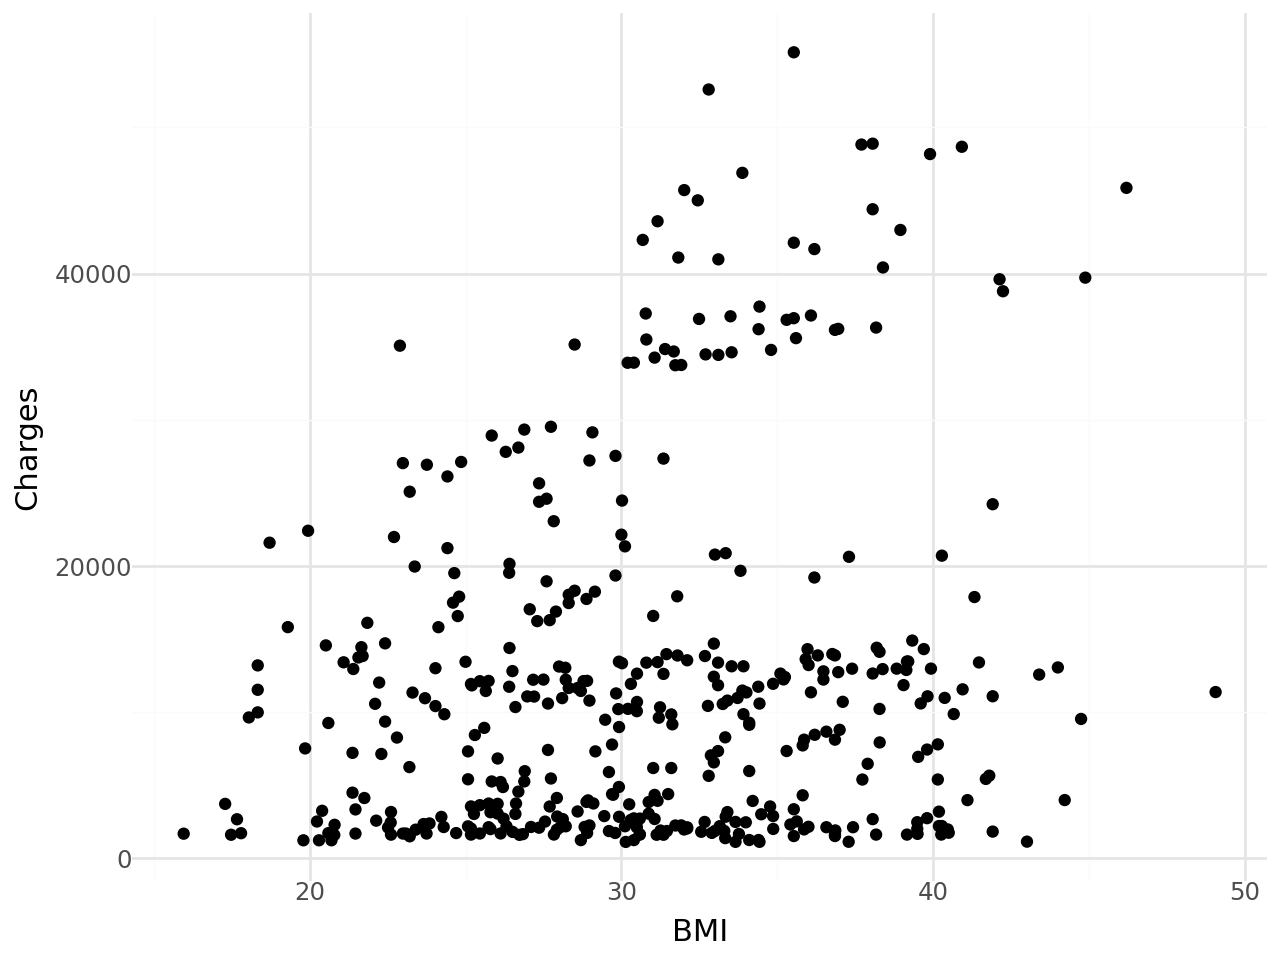

In [6]:
(ggplot(datadum, aes(x='bmi', y='charges'))
+ geom_point()
+labs(x="BMI", y="Charges")
+theme_minimal())

There is less of a clear trend for bmi as there was with age, but there is still a somewhat small trend where as BMI increases so does insurance costs.

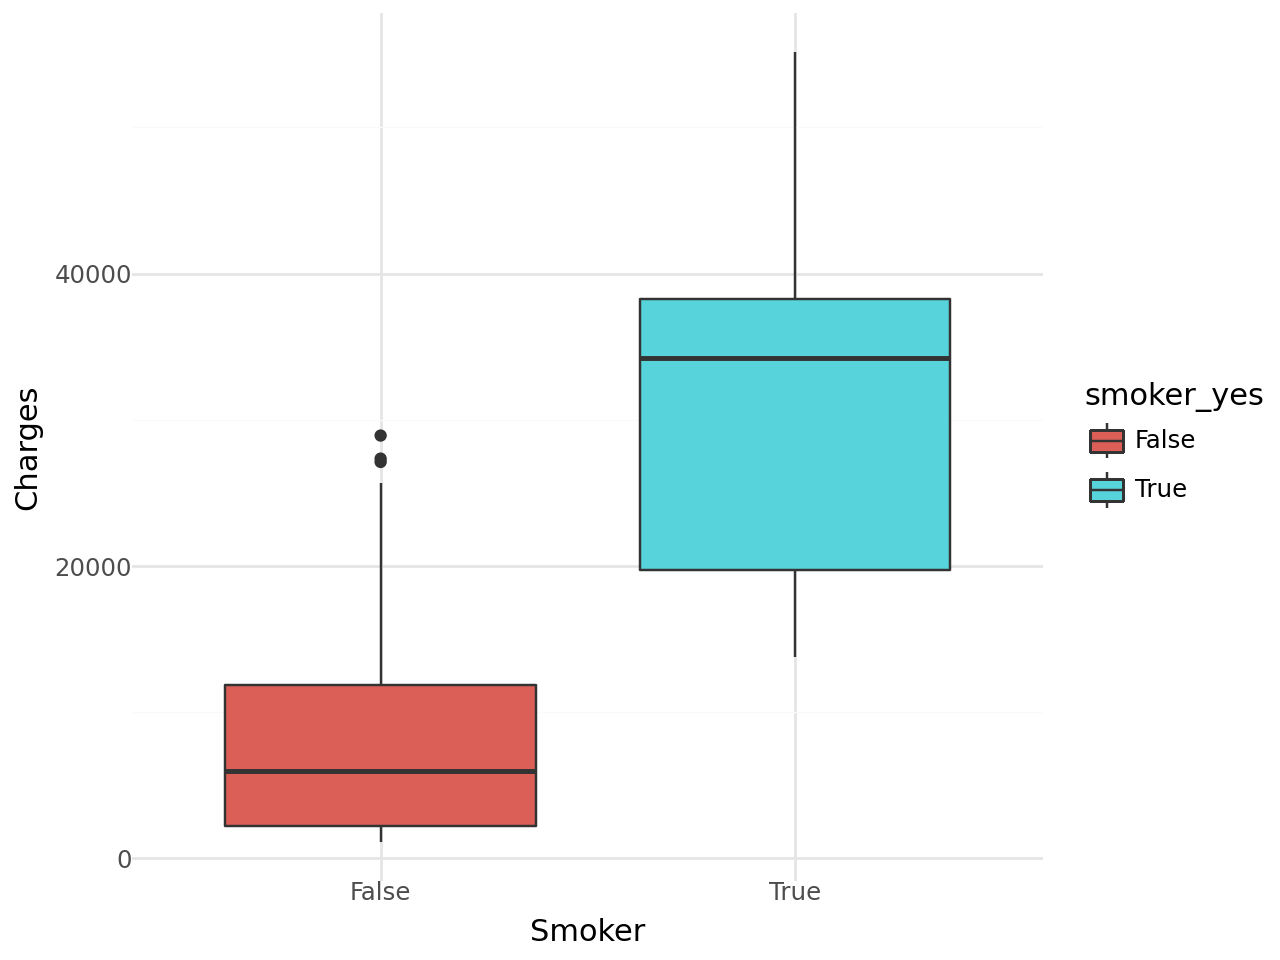

In [9]:
(ggplot(datadum, aes(x='smoker_yes', y='charges', fill="smoker_yes"))
+ geom_boxplot()
+labs(x="Smoker", y="Charges")
+theme_minimal())

There is a clear trend that smokers play more for health insurance than nonsmokers.

Part 2: Simple linear models

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

1) simple linear model to predict insurance charge based on age

In [11]:
y=datadum['charges']
X=datadum[['age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

intecept=lr_fit.intercept_
coefs=lr_fit.coef_[0]

lr_pred_test = lr_fit.predict(X_test)
lr_pred_train = lr_fit.predict(X_train)

r2test=r2_score(y_test, lr_pred_test)
r2train=r2_score(y_train, lr_pred_train)

mse_test=mean_squared_error(y_test, lr_pred_test)
mse_train=mean_squared_error(y_train, lr_pred_train)

print("Q1:model of age")
print("model intercept:", {intecept})
print("model coefficients:", {coefs})
print("r2 test:", {r2test})
print("r2 train:", {r2train})
print("mse test:", {mse_test})
print("mse train:", {mse_train})


Q1:model of age
model intercept: {4312.766859634175}
model coefficients: {217.2381084606727}
r2 test: {0.15290593504930705}
r2 train: {0.08343810192905088}
mse test: {98969665.21680348}
mse train: {136163806.03628197}


The model has an intercept of 4312, which means that a person of age zero would have a charge of 4,312 dollars for insurance, which is a weird number because in our case no one would be zero and have insuraunce so the intercept is outside of our model. The age coeficent is 217, which means for every year you age the insurance rate goes up by 217 dollars.
In model one which is based on age, we have a low R^2 value at .159, which means that age only accounts for ~15.3% of variablity in charges for insurance. Addionally we have a  high MSE value at 98969665, meaning that the squared error of the model is 98969665 dollars squared.

2)simple linear based on age and sex

In [12]:
y=datadum['charges']
X=datadum[['age','sex_male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

intecept=lr_fit.intercept_
coefs_age=lr_fit.coef_[0]
coefs_sex=lr_fit.coef_[1]

lr_pred_test = lr_fit.predict(X_test)
lr_pred_train = lr_fit.predict(X_train)

r2test=r2_score(y_test, lr_pred_test)
r2train=r2_score(y_train, lr_pred_train)

mse_test=mean_squared_error(y_test, lr_pred_test)
mse_train=mean_squared_error(y_train, lr_pred_train)

print("Q:2 model of age and sex")
print("model intercept:", {intecept})
print("model coefficients age:", {coefs_age})
print("model coefficients sex:", {coefs_sex})
print("r2 test:", {r2test})
print("r2 train:", {r2train})
print("mse test:", {mse_test})
print("mse train:", {mse_train})

Q:2 model of age and sex
model intercept: {4249.07156966828}
model coefficients age: {217.2818993791863}
model coefficients sex: {129.29644978775818}
r2 test: {0.15411735770595847}
r2 train: {0.0834661857907103}
mse test: {98828129.46566842}
mse train: {136159633.91708326}


3) simple linear with age and smoker

In [13]:
y=datadum['charges']
X=datadum[['age','smoker_yes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

intecept=lr_fit.intercept_
coefs_age=lr_fit.coef_[0]
coefs_smoker=lr_fit.coef_[1]

lr_pred_test = lr_fit.predict(X_test)
lr_pred_train = lr_fit.predict(X_train)

r2test=r2_score(y_test, lr_pred_test)
r2train=r2_score(y_train, lr_pred_train)

mse_test=mean_squared_error(y_test, lr_pred_test)
mse_train=mean_squared_error(y_train, lr_pred_train)

print("Q3:model of age and smoker")
print("model intercept:", {intecept})
print("model coefficients age:", {coefs_age})
print("model coefficients smoker:", {coefs_smoker})
print("r2 test:", {r2test})
print("r2 train:", {r2train})
print("mse test:", {mse_test})
print("mse train:", {mse_train})

Q3:model of age and smoker
model intercept: {-1732.7158691715777}
model coefficients age: {240.94737691152395}
model coefficients smoker: {24840.523719948564}
r2 test: {0.735165309400182}
r2 train: {0.7653037036364093}
mse test: {30941782.91520124}
mse train: {34866320.58647062}


4) which one is best

Model 3, which is based on age and smoker is a much better predictor of insurance costs. You can see this becuase it has the the highest R^2 and the lowers MSE. Meaning it is the closest to predicting the actual cost of insurance.

Part 3: multiple linear models

1) age and bmi

In [14]:
y=datadum['charges']
X4=datadum[['age','bmi']]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25, random_state=1)

lr_fit4 = lr.fit(X4_train, y4_train)

intecept=lr_fit4.intercept_
coefs_age4=lr_fit4.coef_[0]
coefs_bmi4=lr_fit4.coef_[1]

lr_pred_test4 = lr_fit4.predict(X4_test)
lr_pred_train4 = lr_fit4.predict(X4_train)

r2test4=r2_score(y4_test, lr_pred_test4)
r2train4=r2_score(y4_train, lr_pred_train4)

mse_test4=mean_squared_error(y4_test, lr_pred_test4)
mse_train4=mean_squared_error(y4_train, lr_pred_train4)

pred4=lr_fit4.predict(X4)
print("Q4:model of age and bmi")
print("model intercept:", {intecept})
print("model coefficients age:", {coefs_age4})
print("model coefficients smoker:", {coefs_bmi4})
print("r2 test:", {r2test4})
print("r2 train:", {r2train4})
print("mse test:", {mse_test4})
print("mse train:", {mse_train4})

Q4:model of age and bmi
model intercept: {-3654.733017016162}
model coefficients age: {200.71454876670845}
model coefficients smoker: {276.2431552714359}
r2 test: {0.1797485291449319}
r2 train: {0.10291336936652862}
mse test: {95833528.79333656}
mse train: {133270573.68237045}


Compared to model Q1, this model Q4 has a higher R^2 and a lower MSE. meaning it is a better model than Q1 in part 2.

2) multipel linear model with age and age sqaured

In [29]:
y=datadum['charges']
X=datadum[['age']]
X['age_sqrd']=X['age']**2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

intecept=lr_fit.intercept_
coefs_age=lr_fit.coef_[0]
coefs_agesq=lr_fit.coef_[1]

lr_pred_test = lr_fit.predict(X_test)
lr_pred_train = lr_fit.predict(X_train)

r2test=r2_score(y_test, lr_pred_test)
r2train=r2_score(y_train, lr_pred_train)

mse_test=mean_squared_error(y_test, lr_pred_test)
mse_train=mean_squared_error(y_train, lr_pred_train)

print("Q5:model of age and age^2")
print("model intercept:", {intecept})
print("model coefficients age:", {coefs_age})
print("model coefficientsage^2:", {coefs_agesq})
print("r2 test:", {r2test})
print("r2 train:", {r2train})
print("mse test:", {mse_test})
print("mse train:", {mse_train})

Q5:model of age and age^2
model intercept: {2788.650846874736}
model coefficients age: {309.8288712939907}
model coefficientsage^2: {-1.16770465709934}
r2 test: {0.15287835069471756}
r2 train: {0.08370271709337618}
mse test: {98972888.01631525}
mse train: {136124494.98922092}


Compared to model Q1, model Q5 has a lower R^2 value and a lower MSE value, however it is very close to the actual values in Q1. Showing that there is not a age^2 is not really that better of a predictor than just age alone.

3) multiple linear model of degree 4

In [30]:
y=datadum['charges']
X=datadum[['age']]

polynomial=PolynomialFeatures(degree=4, include_bias=False)
Xpoly=polynomial.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

intecept=lr_fit.intercept_
coefs_age=lr_fit.coef_


lr_pred_test = lr_fit.predict(X_test)
lr_pred_train = lr_fit.predict(X_train)

r2test=r2_score(y_test, lr_pred_test)
r2train=r2_score(y_train, lr_pred_train)

mse_test=mean_squared_error(y_test, lr_pred_test)
mse_train=mean_squared_error(y_train, lr_pred_train)

print("Q6:model of age degree 4")
print("model intercept:", {intecept})
print("model coefficients age:", coefs_age)
print("r2 test:", {r2test})
print("r2 train:", {r2train})
print("mse test:", {mse_test})
print("mse train:", {mse_train})

Q6:model of age degree 4
model intercept: {82711.10700584466}
model coefficients age: [-9.47029276e+03  4.17174306e+02 -7.43779592e+00  4.68152720e-02]
r2 test: {0.15554320663160015}
r2 train: {0.09304422534924806}
mse test: {98661541.3656459}
mse train: {134736726.93894964}


This model also has a higher r^2 value and a hilowergher MSE value. Making it that it a better fit than the model Q1.

4) ploynomial degree 12

In [31]:
y=datadum['charges']
X12=datadum[['age']]

polynomial12=PolynomialFeatures(degree=12, include_bias=False)
Xpoly12=polynomial12.fit_transform(X)

X12_train, X12_test, y12_train, y12_test = train_test_split(Xpoly12, y, test_size=0.25, random_state=1)

lr_fit12 = lr.fit(X12_train, y12_train)

intecept=lr_fit12.intercept_
coefs_age12=lr_fit12.coef_


lr_pred_test12 = lr_fit12.predict(X12_test)
lr_pred_train12 = lr_fit12.predict(X12_train)

r2test12=r2_score(y12_test, lr_pred_test12)
r2train12=r2_score(y12_train, lr_pred_train12)

mse_test12=mean_squared_error(y12_test, lr_pred_test12)
mse_train12=mean_squared_error(y12_train, lr_pred_train12)
pred12=lr_fit12.predict(Xpoly12)

print("Q7:model of age degree 12")
print("model intercept:", {intecept})
print("model coefficients age:", coefs_age12)
print("r2 test:", {r2test12})
print("r2 train:", {r2train12})
print("mse test:", {mse_test12})
print("mse train:", {mse_train12})

Q7:model of age degree 12
model intercept: {5243.049978360752}
model coefficients age: [ 1.04690581e-09  3.34017796e-05  7.78726611e-07  1.20433981e-05
  1.43458553e-04  9.56214621e-04 -1.13499059e-04  5.55818297e-06
 -1.43632687e-07  2.06245689e-09 -1.55936908e-11  4.85037290e-14]
r2 test: {0.13368326259480134}
r2 train: {0.0959369152017977}
mse test: {101215533.22144526}
mse train: {134306990.92130077}


Model Q7 has a lower R^2 value and a higher MSE value than model Q1, making it a worse overall better predictor than Q1.

5) what is the best

According to the models the best one is model Q4, aka Q1 pt 3, which is one with bmi and age. It has the best MSE value and one of the highest R^2 values of all models. I would partically agree with this, I would say it would be important to also have smoking as part of the relationship as well.

6) plot predictions ofr model Q4 as a line plot

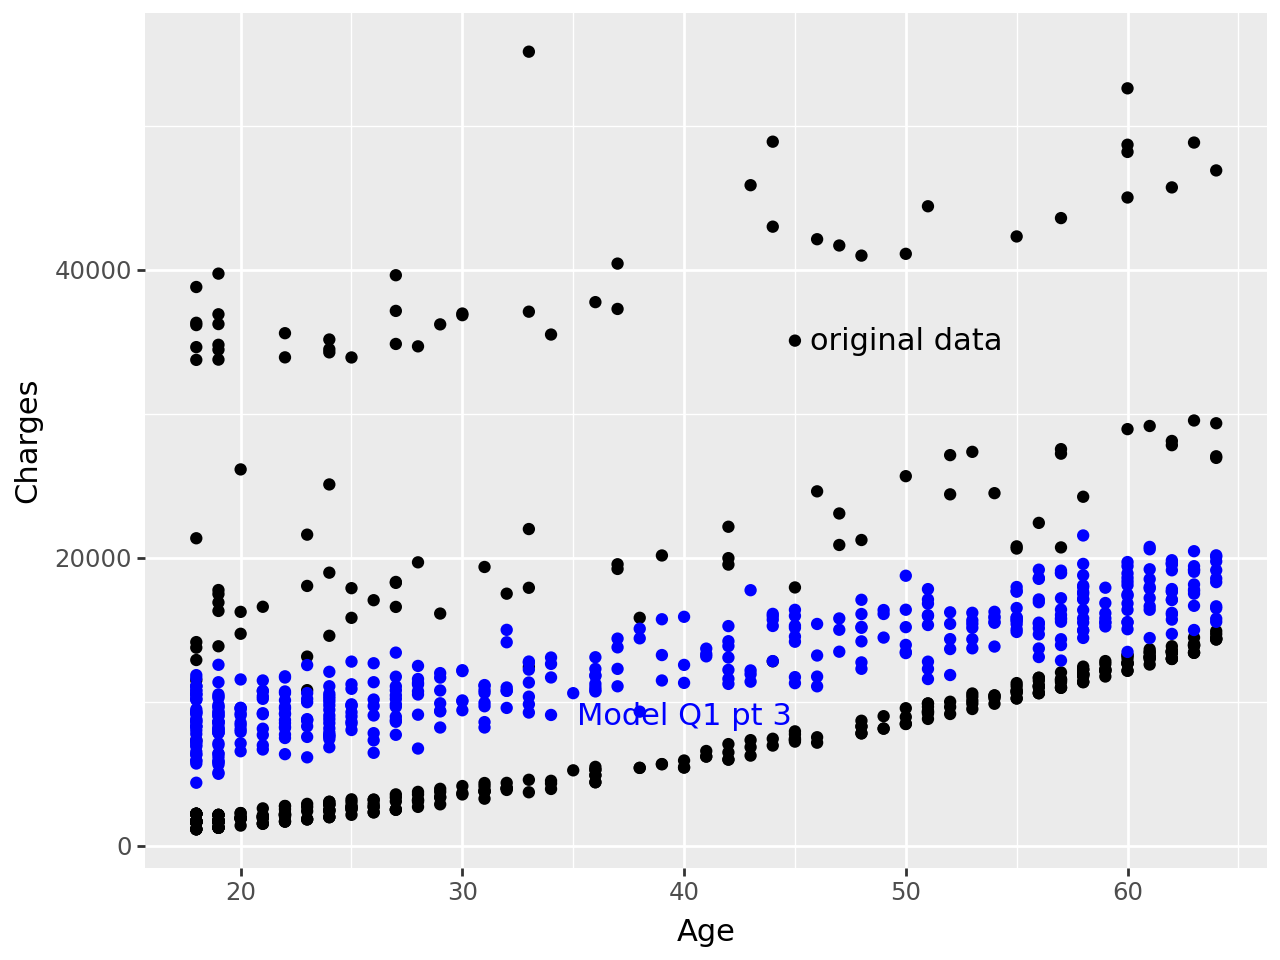

In [32]:
(ggplot(datadum, aes(x='age', y='charges'))
+ geom_point()
+geom_point(aes(y=pred4), color="blue")
+labs(x="Age", y="Charges")
+ annotate("text", x=40, y=9000, label="Model Q1 pt 3", color="blue")
+ annotate("text", x=50, y=35000, label="original data", color="black")
)

Part 4: New data

In [33]:
data2=pd.read_csv("/content/insurance_costs_2.csv")
data2.dropna()
data2 = pd.get_dummies(data2, columns=['sex', 'smoker'], drop_first=True)

1) for just age

In [34]:
y=datadum['charges']
X=datadum[['age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

Xage1=data2[['age']]
yage1=data2['charges']
predage1=lr_fit.predict(Xage1)
mseage1=mean_squared_error(yage1, predage1)
print("Q1:New model of age")
print("mse:", {mseage1})

Q1:New model of age
mse: {136485823.24974006}


2)age and bmi

In [35]:
y=datadum['charges']
X=datadum[['age','bmi']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

Xab2=data2[['age','bmi']]
yab2=data2['charges']
predab2=lr_fit.predict(Xab2)
mseab2=mean_squared_error(yab2, predab2)
print("Q2:New model of age and bmi")
print("mse:", {mseab2})

Q2:New model of age and bmi
mse: {133131174.91895783}


3) Age,bmi and smoker

In [36]:
y=datadum['charges']
X=datadum[['age','bmi','smoker_yes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

Xabs=data2[['age','bmi','smoker_yes']]
yabs=data2['charges']
predabs=lr_fit.predict(Xabs)
mseabs=mean_squared_error(yabs, predabs)
print("Q3:New model of age, bmi, and smoking")
print("mse:", {mseabs})

Q3:New model of age, bmi, and smoking
mse: {36002819.03355168}


4) age, bmi, and smoking interaction

In [37]:
y=datadum['charges']
X=datadum[['age','bmi','smoker_yes']]
X['age_smoker']=X['age']*X['smoker_yes']
X['bmi_smoker']=X['bmi']*X['smoker_yes']
X=X[['age','bmi','age_smoker','bmi_smoker']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

Xabs=data2[['age','bmi','smoker_yes']]
Xabs['age_smoker']=Xabs['age']*Xabs['smoker_yes']
Xabs['bmi_smoker']=Xabs['bmi']*Xabs['smoker_yes']
Xabs=Xabs[['age','bmi','age_smoker','bmi_smoker']]
yabs=data2['charges']
predabs=lr_fit.predict(Xabs)
mseabs=mean_squared_error(yabs, predabs)
print("Q4:New model of age, bmi, and smoking with interaction only")
print("mse:", {mseabs})

Q4:New model of age, bmi, and smoking with interaction only
mse: {25184980.722010046}


5) Age, bmi, smoking interaction and smoking

In [38]:
y=datadum['charges']
X=datadum[['age','bmi','smoker_yes']]
X['age_smoker']=X['age']*X['smoker_yes']
X['bmi_smoker']=X['bmi']*X['smoker_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr_fit = lr.fit(X_train, y_train)

Xabs=data2[['age','bmi','smoker_yes']]
Xabs['age_smoker']=Xabs['age']*Xabs['smoker_yes']
Xabs['bmi_smoker']=Xabs['bmi']*Xabs['smoker_yes']
yabs=data2['charges']
predabs=lr_fit.predict(Xabs)
mseabs=mean_squared_error(yabs, predabs)
print("Q5:New model of age, bmi, and smoking with interaction and smoking")
print("mse:", {mseabs})

Q5:New model of age, bmi, and smoking with interaction and smoking
mse: {21907986.3496586}


6) model Q5 with Age, Bmi, Smoking, and the iteraction between smoking and age and smoking and bmi best fit the model. It has the lowest MSE.

7) plot for model Q5

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

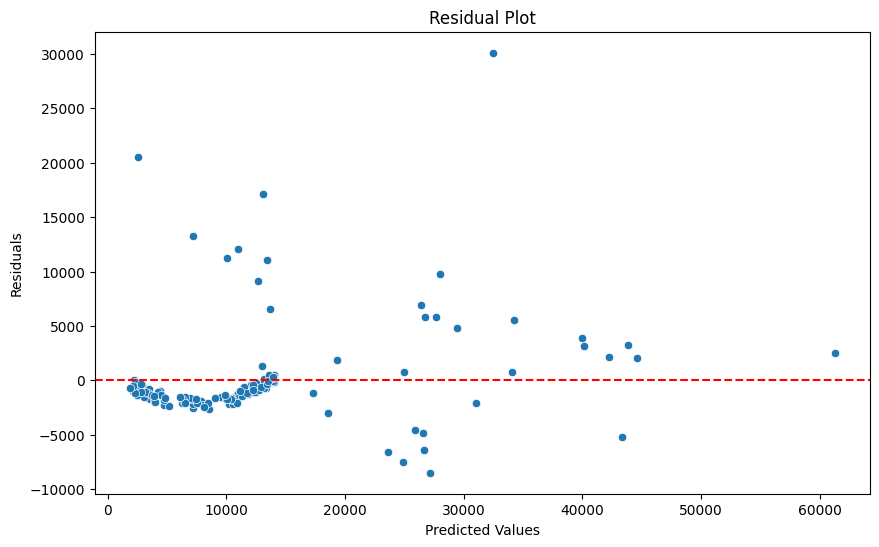

In [40]:
plt.figure(figsize=(10,6))
residuals=yabs-predabs
sns.scatterplot(x=predabs, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Part 5: Full exploration

had to ask chat to help with this to automate testing out which degree of each one works best

best degree: 2
best mse: 21549294.357748084
best poly: PolynomialFeatures(include_bias=False)
Variables used in the best model: ['age' 'bmi' 'smoker_yes' 'sex_male' 'age^2' 'age bmi' 'age smoker_yes'
 'age sex_male' 'bmi^2' 'bmi smoker_yes' 'bmi sex_male' 'smoker_yes^2'
 'smoker_yes sex_male' 'sex_male^2']


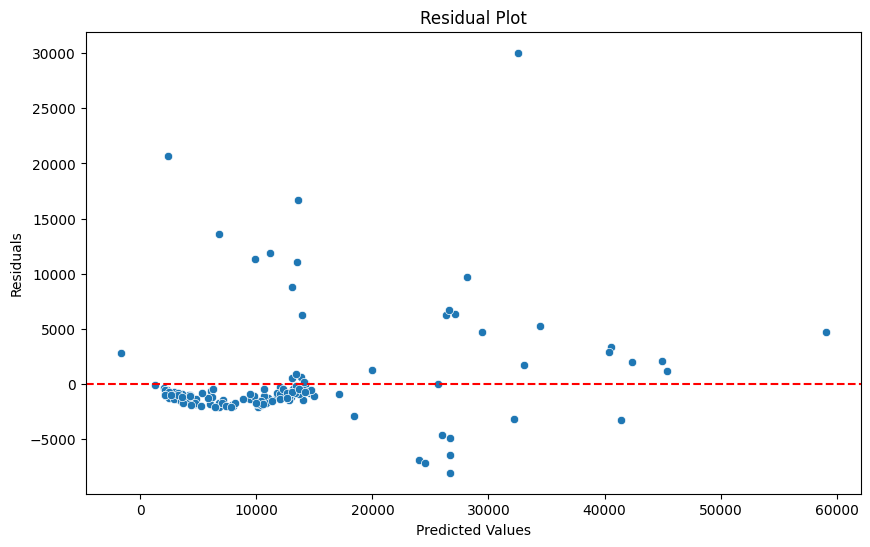

In [47]:
degrees=[1,2,3,4,5,6,7,8,9,10,11,12]
bestdegree=0
bestmse=float('inf')
bestmodel=None
bestpoly=None
for degree in degrees:
  polynomial=PolynomialFeatures(degree=degree, include_bias=False)
  xpolyog=polynomial.fit_transform(datadum[['age','bmi','smoker_yes','sex_male']])
  yog=datadum['charges']
  lr=LinearRegression()
  lr.fit(xpolyog, yog)
  xpolynew=polynomial.transform(data2[['age','bmi','smoker_yes','sex_male']])
  ynew=data2['charges']
  prednew=lr.predict(xpolynew)
  msenew=mean_squared_error(ynew, prednew)
  if msenew<bestmse:
    bestmse=msenew
    bestdegree=degree
    bestmodel=lr
    bestpoly=polynomial
print("best degree:", bestdegree)
print("best mse:", bestmse)
print("best poly:", bestpoly)
feature_names = bestpoly.get_feature_names_out(input_features=['age', 'bmi', 'smoker_yes', 'sex_male'])
print("Variables used in the best model:", feature_names)
xnewpolyb=bestpoly.transform(data2[['age','bmi','smoker_yes','sex_male']])
prednewb=bestmodel.predict(xnewpolyb)
residualsb=ynew-prednewb
plt.figure(figsize=(10,6))
sns.scatterplot(x=prednewb, y=residualsb)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')

